In [1]:
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
bos_cal = pd.read_csv("calendar.csv", parse_dates=["date"])
bos_listing = pd.read_csv("listings.csv")
bos_reviews = pd.read_csv("reviews.csv")

In [3]:
sea_cal = pd.read_csv("sea_calendar.csv", parse_dates=["date"])
sea_listing = pd.read_csv("sea_listings.csv")
sea_reviews = pd.read_csv("sea_reviews.csv")

# Boston Data shape

In [4]:
#Calendar Data
bos_cal.shape

(1308890, 4)

In [5]:
#Listing Data
bos_listing.shape

(3585, 95)

In [6]:
#Reviews
bos_reviews.shape

(68275, 6)

# Boston Data Missing

In [7]:
#Calander Data
bos_cal.isnull().sum()

listing_id         0
date               0
available          0
price         665853
dtype: int64

In [8]:
print("{:.3}% idle time.".format(bos_cal.isnull().sum()[3]/bos_cal.shape[0]*100))

50.9% idle time.


In [9]:
bos_cal["available"].value_counts()

f    665853
t    643037
Name: available, dtype: int64

# 1. Question: In which months occupancy rates increases?

In [10]:
bos_cal.head(2)

,listing_id,date,available,price
0,12147973,2017-09-05,f,NaN
1,12147973,2017-09-04,f,NaN


In [11]:
bos_cal[bos_cal["available"] == "f"]["price"].unique()

array([nan], dtype=object)

In [12]:
bos_cal["price"].unique()

array([nan, '$65.00', '$75.00', ..., '$1,030.00', '$2,895.00', '$11.00'],
      dtype=object)

In [13]:
bos_cal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1308890 entries, 0 to 1308889
Data columns (total 4 columns):
listing_id    1308890 non-null int64
date          1308890 non-null datetime64[ns]
available     1308890 non-null object
price         643037 non-null object
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 39.9+ MB


In [14]:
bos_cal1=bos_cal.set_index("date")

In [15]:
bos_cal1["2017-08"]["available"].value_counts()

f    55605
t    55561
Name: available, dtype: int64

In [16]:
print("Occupancy rate of August 2017 is {:.3}%".format(bos_cal1["2017-08"]["available"].value_counts()[0]/bos_cal1["2017-08"].shape[0]*100))

Occupancy rate of August 2017 is 50.0%


In [17]:
bos_cal["date"].min()

Timestamp('2016-09-06 00:00:00')

In [18]:
bos_cal["date"].max()

Timestamp('2017-09-05 00:00:00')

In [19]:
listOfMonths = ["2016-9","2016-10","2016-11","2016-12","2017-01","2017-02"
               ,"2017-03","2017-04","2017-05","2017-06","2017-07","2017-08"]

occRateDict = {}

for month in listOfMonths:
    occRateDict[month]=bos_cal1[month]["available"].value_counts()[0]/bos_cal1[month].shape[0]*100

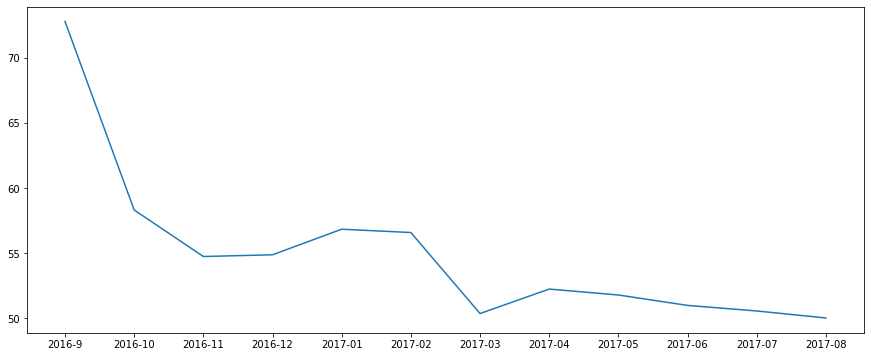

In [20]:
plt.figure(figsize=(15,6))
plt.plot(list(occRateDict.keys()),list(occRateDict.values()))

# 2. Question: Average room price for every month?

In [58]:
def returnPricesAsInt(i):
    "takes price data with dollar sign and converts it to float"
    if i[0] == "$":
        i = i[1:]

    if i[-3:] == ".00":
        i = i[:-3]
        
    if "," in i:
        i = i.replace("," ,"")
    
    i = float(i)
    return i

In [22]:
print("Mean room price for 2017 August is {:.4}$".format(bos_cal1["2017-8"]["price"].dropna().apply(returnPricesAsInt).mean()))

Mean room price for 2017 August is 203.3$


In [23]:
avgRoomPrice = {}

for month in listOfMonths:
    avgRoomPrice[month] = bos_cal1[month]["price"].dropna().apply(returnPricesAsInt).mean()

In [24]:
avgRoomPrice

{'2016-9': 252.67730830703658,
 '2016-10': 233.4162477074118,
 '2016-11': 202.9244158402391,
 '2016-12': 192.60191484827124,
 '2017-01': 182.7996707871037,
 '2017-02': 180.96102798803028,
 '2017-03': 181.81874195828274,
 '2017-04': 197.25289011716166,
 '2017-05': 193.7122947761194,
 '2017-06': 196.5353018148717,
 '2017-07': 202.4863089714899,
 '2017-08': 203.33014164611868}

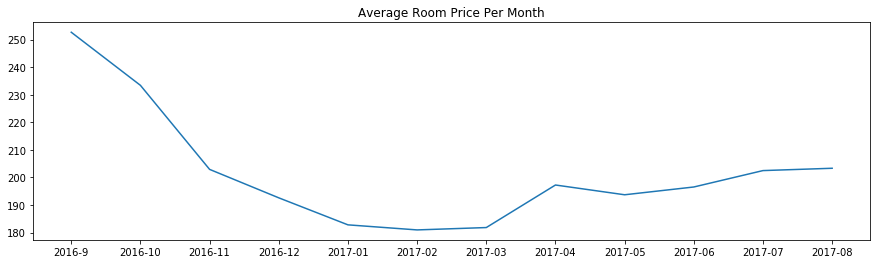

In [25]:
plt.figure(figsize=(15,4))
plt.plot(list(avgRoomPrice.keys()),list(avgRoomPrice.values()));
plt.title("Average Room Price Per Month");

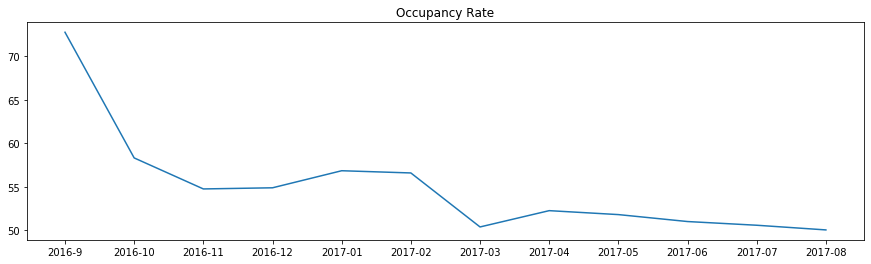

In [26]:
plt.figure(figsize=(15,4))
plt.plot(list(occRateDict.keys()),list(occRateDict.values()));
plt.title("Occupancy Rate");

In [27]:
# Doluluk oranlarının artması ev sahiplerinin ortalama fiyatlarını arttımasına nedne olmuş. Ancak marttan sonra ev
#sahiplerinin ortlama fiyatlarını arttırmaya başlamaları doluluk oranlarının düşmesine sebep vermiş.

# Question 3: Does high review score correlated with occupancy rate?

In [28]:
bos_listing.shape

(3585, 95)

In [29]:
bos_listing1=bos_listing[bos_listing["number_of_reviews"] > 5]

In [30]:
bos_listing1.shape

(1758, 95)

In [31]:
bos_listing1["price"]=bos_listing1["price"].apply(returnPricesAsInt)


C:\Users\09775\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


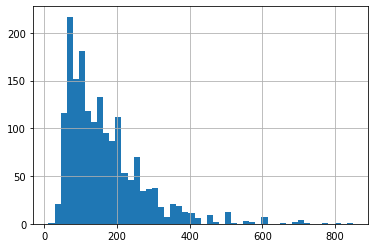

In [32]:
bos_listing1["price"].hist(bins=50)

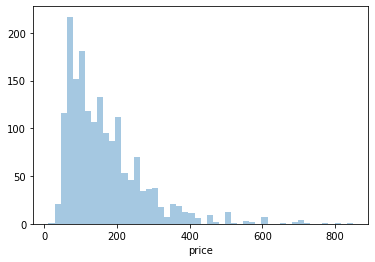

In [33]:
sns.distplot(bos_listing1["price"], bins=50,kde=False)

In [34]:
bin_edges = np.linspace(bos_listing1["price"].min(),bos_listing1["price"].max(),50)

In [35]:
bos_listing1["price"] = pd.cut(bos_listing1["price"], bin_edges)

C:\Users\09775\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [36]:
x = np.linspace(20,841,40)

In [37]:
bos_price_rating=bos_listing1.groupby("price").mean().review_scores_rating.dropna()

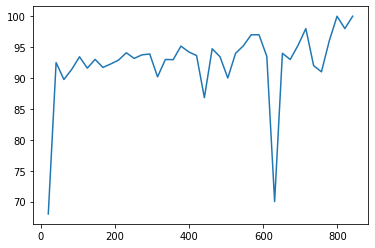

In [38]:
plt.plot(x,bos_price_rating.values);

# Question 4: Does high review score increase your occupancy rate.

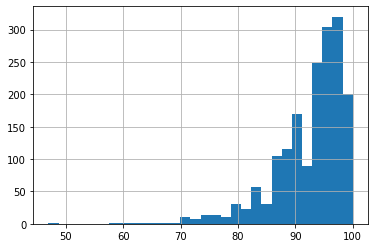

In [39]:
bos_listing1["review_scores_rating"].hist(bins=30)

In [40]:
bos_listing1["review_scores_rating"].describe()

count    1758.000000
mean       92.502275
std         6.378031
min        47.000000
25%        90.000000
50%        94.000000
75%        97.000000
max       100.000000
Name: review_scores_rating, dtype: float64

In [41]:
bin_edges = [47, 90, 94, 97, 100]
bin_labels = ["low", "medium", "mod_high", "high"]

In [42]:
bos_listing1["review_scores"] = pd.cut(bos_listing1["review_scores_rating"],bin_edges,labels=bin_labels)

C:\Users\09775\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [43]:
low_score_ids = bos_listing1["id"][bos_listing1["review_scores"] == "low"]
medium_score_ids = bos_listing1["id"][bos_listing1["review_scores"] == "medium"]
modHigh_score_ids = bos_listing1["id"][bos_listing1["review_scores"] == "mod_high"]
high_score_ids = bos_listing1["id"][bos_listing1["review_scores"] == "high"]

In [44]:
len(low_score_ids)

509

In [45]:
len(medium_score_ids)

424

In [46]:
len(modHigh_score_ids)

471

In [47]:
len(high_score_ids)

353

In [48]:
bos_cal1.head()

,listing_id,available,price
date,,,
2017-09-05,12147973,f,NaN
2017-09-04,12147973,f,NaN
2017-09-03,12147973,f,NaN
2017-09-02,12147973,f,NaN
2017-09-01,12147973,f,NaN


In [49]:
bos_cal1[bos_cal1["listing_id"]==12147973]["available"].value_counts()[0]/bos_cal1[bos_cal1["listing_id"]==12147973]["available"].shape[0]

1.0

In [50]:
low_score_occ_list = []
for id in low_score_ids:
    low_score_occ_list.append(bos_cal1[bos_cal1["listing_id"]==id]["available"].value_counts()[0]/bos_cal1[bos_cal1["listing_id"]==id]["available"].shape[0])

low_score_mean = sum(low_score_occ_list)/len(low_score_occ_list)
low_score_mean


0.8581478590844264

In [51]:
medium_score_occ_list = []
for id in medium_score_ids:
    medium_score_occ_list.append(bos_cal1[bos_cal1["listing_id"]==id]["available"].value_counts()[0]/bos_cal1[bos_cal1["listing_id"]==id]["available"].shape[0])

medium_score_mean = sum(medium_score_occ_list)/len(medium_score_occ_list)
medium_score_mean


0.8427371413802022

In [52]:
modHigh_score_occ_list = []
for id in modHigh_score_ids:
    modHigh_score_occ_list.append(bos_cal1[bos_cal1["listing_id"]==id]["available"].value_counts()[0]/bos_cal1[bos_cal1["listing_id"]==id]["available"].shape[0])

modHigh_score_mean = sum(modHigh_score_occ_list)/len(modHigh_score_occ_list)
modHigh_score_mean


0.8346799290346973

In [53]:
high_score_occ_list = []
for id in high_score_ids:
    high_score_occ_list.append(bos_cal1[bos_cal1["listing_id"]==id]["available"].value_counts()[0]/bos_cal1[bos_cal1["listing_id"]==id]["available"].shape[0])

high_score_mean = sum(high_score_occ_list)/len(high_score_occ_list)
high_score_mean


0.8394815475959487

In [54]:
labels = bin_labels
occupancy_rates = [low_score_mean, medium_score_mean, modHigh_score_mean, high_score_mean]

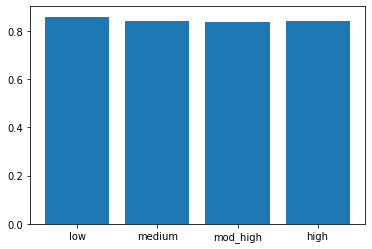

In [55]:
plt.bar(height=occupancy_rates,x=labels);

# Question 5: Does paying more cause you to review more?

In [56]:
bos_price_review_rate = bos_listing1.groupby("price").mean().reviews_per_month.dropna()

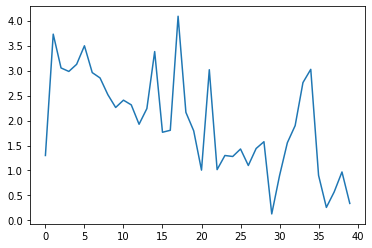

In [57]:
plt.plot(bos_price_review_rate.values)